In [1]:
#pip install nsepy matplotlib

In [2]:
from nsepy import get_index_pe_history
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
import numpy as np

In [3]:
# User can add indices as per requirement
symbol_list = ["NIFTY","NIFTY IT","NIFTY BANK","NIFTY FMCG","NIFTY AUTO","NIFTY OIL & GAS"]

#User can edit the start date for history
start_date = date(2000,1,1)
end_date = date.today()

In [4]:
output = pd.DataFrame()


In [5]:
def pe_data():  
    for i in symbol_list:
        data = get_index_pe_history(symbol =  i ,
                                start= start_date,
                                end= end_date)
        data['Index'] = i
        global output
        output = output.append(data)
    return(output)

In [6]:
pe_data()

,P/E,P/B,Div Yield,Index
Date,,,,
2000-01-03,25.91,4.63,0.95,NIFTY
2000-01-04,26.67,4.76,0.92,NIFTY
2000-01-05,25.97,4.64,0.95,NIFTY
2000-01-06,26.32,4.70,0.94,NIFTY
2000-01-07,26.25,4.69,0.94,NIFTY
...,...,...,...,...
2022-07-18,8.73,2.03,3.84,NIFTY OIL & GAS
2022-07-19,8.71,2.03,3.85,NIFTY OIL & GAS
2022-07-20,8.80,2.05,3.81,NIFTY OIL & GAS


In [7]:
if output.shape[0] == 0:
    output_length = 0
else:
    output_length = len(output['Index'].unique())

input_length = len(symbol_list)



In [8]:
# The API always does not return results as it times out. I put in a while loop to say that keep running the pe_data function until my length of input variable is equal to length of output variable 
start_time = time.time()

while output_length != input_length:
    pe_data()
    #print('No Result Yet')
    if output_length == input_length:
        current_time = time.time()
        elapsed_time = current_time - start_time
        print('Sucsess' + ' ' + str(elapsed_time) + 'seconds')
        break

In [9]:
#Create a 252 long term average for P/E and P/B
output['Mean P/E'] = np.round(output.groupby('Index')['P/E'].transform(lambda x: x.rolling(252, 1).mean()),2)
output['Mean P/B'] = np.round(output.groupby('Index')['P/B'].transform(lambda x: x.rolling(252, 1).mean()),2)



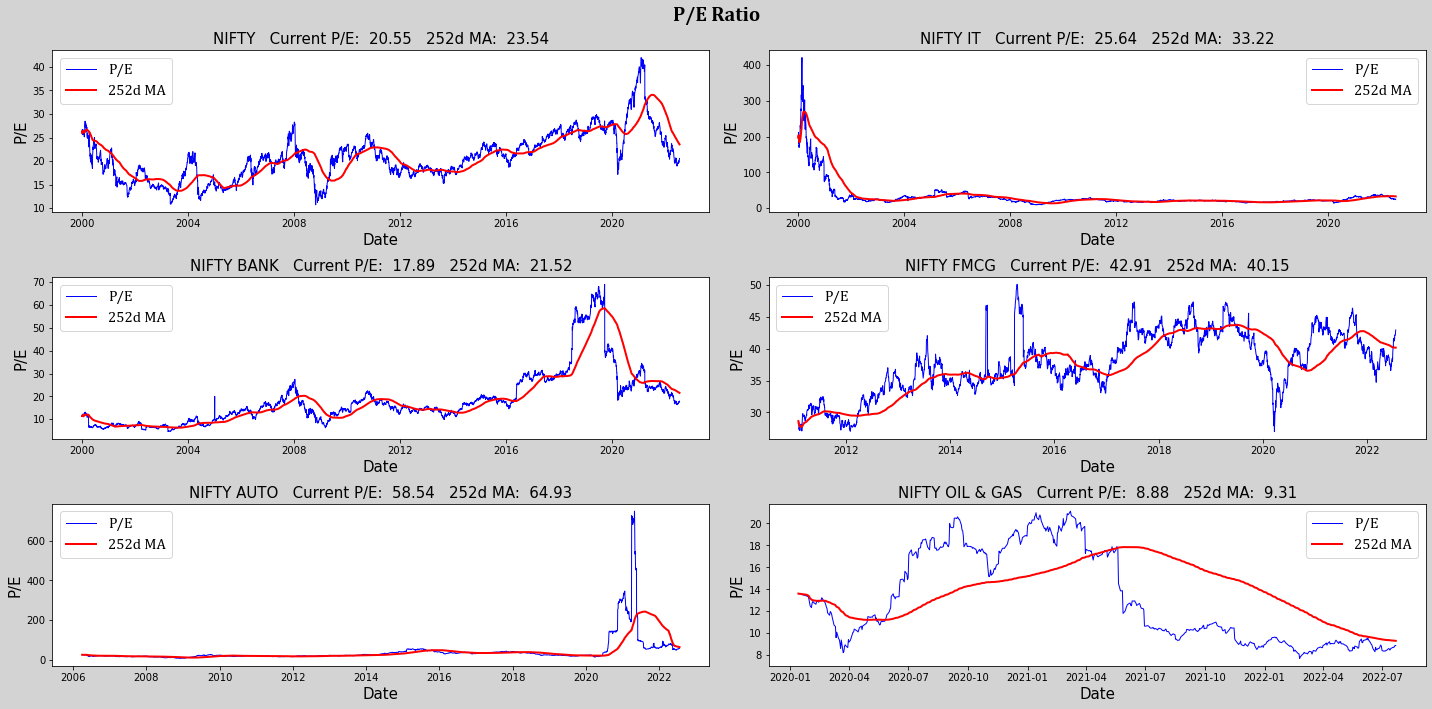

In [10]:
#P/E Plot
fig, axs = plt.subplots(nrows= math.ceil(len(symbol_list)/2), ncols=2,figsize = (20,10) ,facecolor= 'lightgray')
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rcParams["font.family"] = "Cambria"
fig.suptitle("P/E Ratio", fontsize=20 , color = 'black' , weight = 'bold')


ax = axs.ravel()

for symbol, i in zip(symbol_list, range(0,len(symbol_list))):
    y1 = output[output["Index"] == symbol]['P/E']
    y2 = output[output["Index"] == symbol]['Mean P/E']
    latest_value = output[output["Index"] == symbol]['P/E'].iloc[-1]
    latest_value_mean = output[output["Index"] == symbol]['Mean P/E'].iloc[-1]
    ax[i].plot(y1,color = 'blue' , linewidth = 1)
    ax[i].plot(y2,color = 'red' , linewidth = 2)
    ax[i].set_title(symbol + '   Current P/E:  ' + str(latest_value) +'   252d MA:  ' + str(latest_value_mean), fontsize = 15)
    ax[i].set_xlabel('Date', fontsize = 15)
    ax[i].set_ylabel('P/E', fontsize = 15)
    ax[i].legend(['P/E','252d MA'] , fontsize = 15)
    
fig.tight_layout()

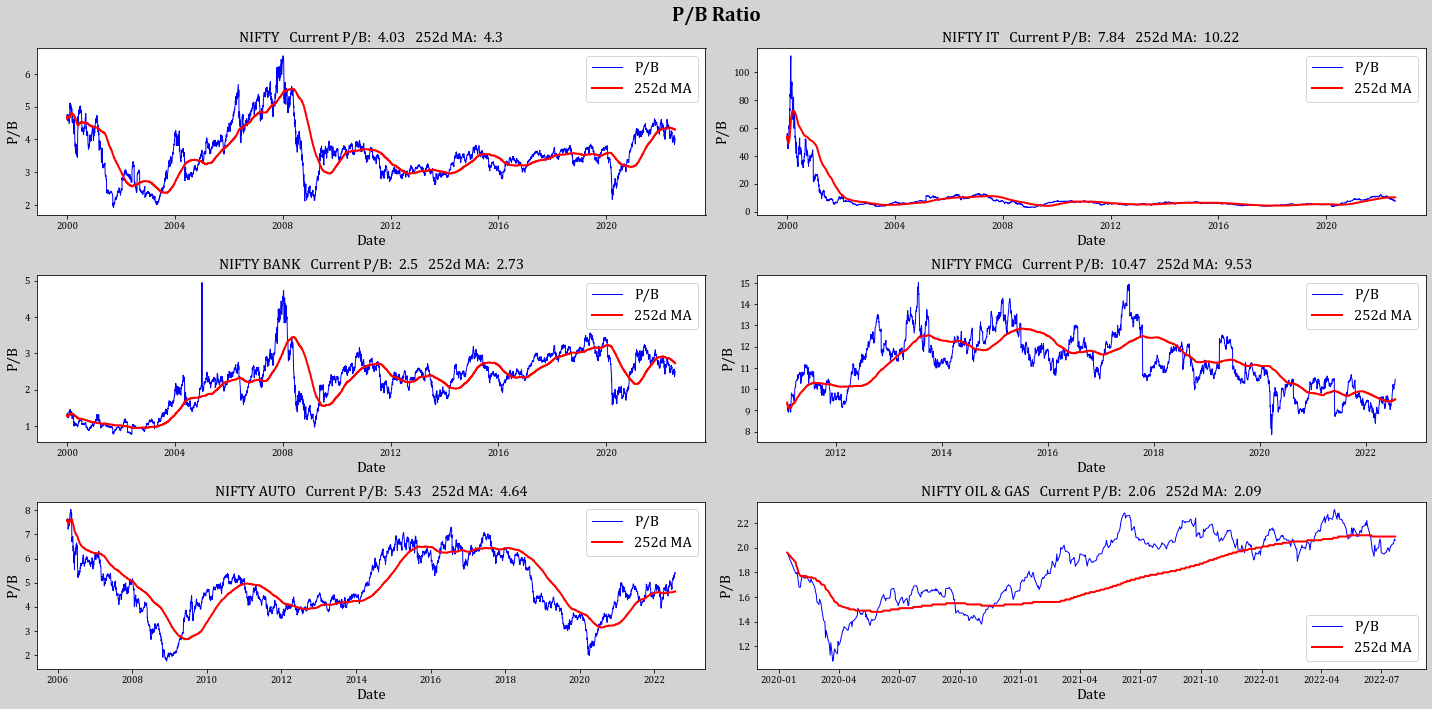

In [11]:
#P/B Plot
fig, axs = plt.subplots(nrows= math.ceil(len(symbol_list)/2), ncols=2,figsize = (20,10) ,facecolor= 'lightgray')
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rcParams["font.family"] = "Cambria"
fig.suptitle("P/B Ratio", fontsize=20 , color = 'black' , weight = 'bold')


ax = axs.ravel()

for symbol, i in zip(symbol_list, range(0,len(symbol_list))):
    y1 = output[output["Index"] == symbol]['P/B']
    y2 = output[output["Index"] == symbol]['Mean P/B']
    latest_value = output[output["Index"] == symbol]['P/B'].iloc[-1]
    latest_value_mean = output[output["Index"] == symbol]['Mean P/B'].iloc[-1]
    ax[i].plot(y1,color = 'blue' , linewidth = 1)
    ax[i].plot(y2,color = 'red' , linewidth = 2)
    ax[i].set_title(symbol + '   Current P/B:  ' + str(latest_value) +'   252d MA:  ' + str(latest_value_mean), fontsize = 15)
    ax[i].set_xlabel('Date', fontsize = 15)
    ax[i].set_ylabel('P/B', fontsize = 15)
    ax[i].legend(['P/B','252d MA'] , fontsize = 15)
    
fig.tight_layout()